In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
import seaborn as sns

import os
import sys
sys.path.append(os.getcwd() + '/src')
import data_cleaning_eda as dce # my defined functions

%matplotlib inline
plt.style.use('ggplot')

# Data Wrangling

## Loading Data to a Pandas DataFrame

In [2]:
# Load data to dataframe
data_file = 'data/cscpopendata.csv'
data_df = pd.read_csv(data_file)

# Get dataframe shape
data_df.shape

(113780, 22)

In [3]:
# Preview top of dataframe
data_df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [4]:
# Preview bottom of dataframe
data_df.tail()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
113775,41351,DP NAIL POLISH ART KIT 18PC,64680.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67737,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113776,41352,DP NAIL POLISH 4PC METALLIC,64681.0,TRANSPARENT - N - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",INTERNATIONAL LACQUER,59,Nail Products,65,...,NaN,67738,Isopropyl alcohol manufacture using strong acids,03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113777,41353,DP EYESHADOW 44 SHADE CUBE,64682.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67739,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113778,41354,DP EYESHADOW PURSE,64683.0,TRANSPARENT - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",NANJING CHANGJIANG PETROLEUM & CHEMICAL,44,Makeup Products (non-permanent),48,...,NaN,67740,"Mineral oils, untreated and mildly treated",03/31/2020,03/31/2020,NaN,03/31/2020,03/31/2020,NaN,1
113779,41355,DP NAIL POLISH GEL LIKE 4PC,64684.0,WHITE - N/A - N/A,1250,"NINGBO MEITELI COSMETICS CO.,LTD.",SUN CHEMICAL,59,Nail Products,65,...,13463-67-7,67741,Titanium dioxide,04/01/2020,04/01/2020,NaN,04/01/2020,04/01/2020,NaN,1


In [5]:
# Get column info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 22 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CSFId                     79917 non-null float64
CSF                       79493 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113568 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
CasNumber                 107464 non-null object
ChemicalId                113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null object
MostRecentDateReported    113780 non-null object
DiscontinuedDate          12906 non-null object
ChemicalCreated

## Handling Null Values

In [6]:
# Show cols with null vals & how many they have
print('Columns with Null Values:')
null_count = data_df.isna().sum()
null_count_df = null_count[null_count > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Columns with Null Values:


,Column,Number of Null Values
5,ChemicalDateRemoved,110848
4,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
3,CasNumber,6316
2,BrandName,212


In [7]:
# Replace all null BrandName values with 'Missing'
data_df2 = data_df.copy()
data_df2.loc[data_df2['BrandName'].isna()==True, 'BrandName'] = 'Missing'

In [8]:
# Updated - Show updated cols with null vals & how many they have
print('Remaining columns with Null Values:')
null_count2 = data_df2.isna().sum()
null_count2_df = null_count2[null_count2 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count2_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Remaining columns with Null Values:


,Column,Number of Null Values
4,ChemicalDateRemoved,110848
3,DiscontinuedDate,100874
1,CSF,34287
0,CSFId,33863
2,CasNumber,6316


### Remaining Columns with Null Values
* ChemicalDateRemoved 
    * **KEEP**, non-null for **reformulated products** only
    * If applicable, date the chemical was removed from product, i.e., reformulation.
* DiscontinuedDate
    * **KEEP**, non-null for **discontinued products** only
    * If applicable, date the product was discontinued.
* CSF 
    * *DROP COLUMN*
    * Color, scent and/or flavor as entered by manufacturer, packer and/or distributor. The color/scent/flavor name is entered as free-text into the reporting database and may contain misspellings or other errors. **Not all products have specific colors, scents or flavors.**
* CSFId
    * *DROP COLUMN*
    * CDPH internal identification number for a color/scent/flavor. **Like CSF, not all products have CSFId.**
* CasNumber
    * *DROP COLUMN* 
    * **Refer to 'CasId'/'ChemicalName' columns instead**
    * Chemical identification number (Chemical Abstracts Service registry number assigned to specific chemical). Note that different forms of a chemical  may have different CAS numbers. What appears here is the CAS number selected by the manufacturer, packer and/or distributor. 

In [9]:
# Check if can indeed refer to 'CasId'/'ChemicalName' columns instead of CasNumber
data_df2[data_df2['CasNumber'].isna()==True][['CasId', 'ChemicalId', 'ChemicalName']]

,CasId,ChemicalId,ChemicalName
49,162,43,Cocamide diethanolamine
62,730,52,Chromium (hexavalent compounds)
432,773,1875,"Retinol/retinyl esters, when in daily dosages ..."
433,773,1876,"Retinol/retinyl esters, when in daily dosages ..."
500,773,453,"Retinol/retinyl esters, when in daily dosages ..."
...,...,...,...
113774,1191,67736,Isopropyl alcohol manufacture using strong acids
113775,1191,67737,Isopropyl alcohol manufacture using strong acids
113776,1191,67738,Isopropyl alcohol manufacture using strong acids
113777,759,67739,"Mineral oils, untreated and mildly treated"


In [10]:
# Drop 4 unnecessary columns
drop_cols = ['CSF', 'CSFId', 'CasNumber', 'ChemicalId']
data_df3 = data_df2.copy()
data_df3 = data_df2.drop(columns=drop_cols)

In [11]:
# Updated - Show final cols with null vals & how many they have
print('Final columns with Null Values:')
null_count3 = data_df3.isna().sum()
null_count3_df = null_count3[null_count3 > 0].to_frame().reset_index().sort_values(0, ascending=False)
null_count3_df.rename(columns={'index': 'Column', 0: 'Number of Null Values'})

Final columns with Null Values:


,Column,Number of Null Values
1,ChemicalDateRemoved,110848
0,DiscontinuedDate,100874


## Converting Date Str Columns to Date-Time Type

In [12]:
date_cols = ['InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 
             'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved']
data_df4 = data_df3.copy()

data_df4[date_cols] = data_df4[date_cols].apply(pd.to_datetime)

data_df4.info()
data_df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113780 entries, 0 to 113779
Data columns (total 18 columns):
CDPHId                    113780 non-null int64
ProductName               113780 non-null object
CompanyId                 113780 non-null int64
CompanyName               113780 non-null object
BrandName                 113780 non-null object
PrimaryCategoryId         113780 non-null int64
PrimaryCategory           113780 non-null object
SubCategoryId             113780 non-null int64
SubCategory               113780 non-null object
CasId                     113780 non-null int64
ChemicalName              113780 non-null object
InitialDateReported       113780 non-null datetime64[ns]
MostRecentDateReported    113780 non-null datetime64[ns]
DiscontinuedDate          12906 non-null datetime64[ns]
ChemicalCreatedAt         113780 non-null datetime64[ns]
ChemicalUpdatedAt         113780 non-null datetime64[ns]
ChemicalDateRemoved       2932 non-null datetime64[ns]
ChemicalCount   

,CDPHId,ProductName,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,SubCategory,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,"Lip Color - Lipsticks, Liners, and Pencils",656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),889,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,3,Glover's Medicated Shampoo,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,Hair Shampoos (making a cosmetic claim),293,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,Eyeliner/Eyebrow Pencils,656,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,Lip Gloss/Shine,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


## Initial Check for Duplicate Rows

In [13]:
# Find number of duplicate rows
duplicates_df = data_df4[data_df4.duplicated()]
duplicates_df.shape

(66853, 18)

In [14]:
# Drop duplicate rows
data_df5 = data_df4.copy()
data_df5 = data_df5.drop_duplicates()
data_df5.shape

(46927, 18)

## Counting Unique Values per Column

In [15]:
# Show number of unique vals per column
print('Number of Unique Values per Column:')
num_unique_df = data_df5.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
0,CDPHId,36794
1,ProductName,33565
4,BrandName,2706
15,ChemicalUpdatedAt,2283
14,ChemicalCreatedAt,2277
11,InitialDateReported,2232
12,MostRecentDateReported,2134
13,DiscontinuedDate,986
2,CompanyId,633
3,CompanyName,604


## Handling Categorical Data

* 36,794 unique products identified by CDPHId, *IGNORE ProductName*
    * Number of unique CDPHId vals > Number of unique ProductName vals
    * Can have multiple categories (PrimaryCategory, SubCategory) 
    * Can have multiple chemicals (ChemicalName)
* 123 unique chemicals identified by ChemicalName, *IGNORE CasId*
    * Number of unique CasId vals > Number of unique ChemicalName vals
* Need to investigate:
    * **Number of unique CompanyId vals > Number of unique CompanyName vals**

#### Messy Company Names

In [16]:
# Show CompanyName counts
# df = pd.DataFrame(data_df5['CompanyName'].value_counts()).reset_index().sort_values('index')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [17]:
# Example of similar CompanyNames that could be merged - 'Fresh'
fresh_df = data_df5[data_df5['CompanyName'].str.contains('Fresh')]
fresh_df[['CompanyId','CompanyName','BrandName']].drop_duplicates()

,CompanyId,CompanyName,BrandName
36890,570,"Fresh, Inc.",Fresh
51907,843,Fresh Inc.,Fresh
89347,1215,Fresh Inc,Fresh


### Replacing Categorical Columns with Cleaned Ones

In [18]:
# Use function to clean categorical columns of interest
data_df6 = dce.clean_cat_data(data_df5, ['CompanyName', 'ProductName', 'SubCategory', 
                                         'BrandName'])
data_df6.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
1,3,338,18,Hair Care Products (non-coloring),25,889,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2,j strickland & co,glover's medicated shampoo,hair shampoos (making a cosmetic claim),glover's
2,3,338,18,Hair Care Products (non-coloring),25,293,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2,j strickland & co,glover's medicated shampoo,hair shampoos (making a cosmetic claim),glover's
3,4,4,44,Makeup Products (non-permanent),46,656,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1,new avon llc,precision glimmer eye liner-all shades �,eyeliner/eyebrow pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon


In [19]:
# # Show Cleaned CompanyName counts - Sorted by name
# df = pd.DataFrame(data_df6['Cleaned_CompanyName'].value_counts()).reset_index().sort_values('index')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [20]:
# # Show Cleaned CompanyName counts - Sorted by count, descending
# df = pd.DataFrame(data_df6['Cleaned_CompanyName'].value_counts()).reset_index().sort_values('Cleaned_CompanyName', ascending=False)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)

In [21]:
# Same example of CompanyNames after cleaning - 'Fresh'
fresh_df6 = data_df6[data_df6['Cleaned_CompanyName'].str.contains('fresh')]
fresh_df6[['CompanyId','Cleaned_CompanyName','Cleaned_BrandName']].drop_duplicates()

,CompanyId,Cleaned_CompanyName,Cleaned_BrandName
36890,570,fresh inc,fresh
51907,843,fresh inc,fresh
89347,1215,fresh inc,fresh


In [22]:
# # Updated - Show number of unique vals per column
# print('Number of Unique Values per Column:')
# num_unique_df = data_df6.nunique(axis=0).to_frame().reset_index()
# num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

## Final Check for Duplicate Rows

In [23]:
# Find number of duplicate rows
duplicates_df6 = data_df6[data_df6.duplicated()]
duplicates_df6.shape

(0, 18)

In [24]:
# Drop duplicate rows
# N/A

In [25]:
# Take final df after cleaning
clean_data_df = data_df6

# EDA

* 36,794 unique products identified by CDPHId
    * Can have multiple categories (PrimaryCategory, Cleaned_SubCategory) 
    * Can have multiple chemicals (ChemicalName)
* 123 unique chemicals identified by ChemicalName

In [26]:
# Number of unique vals per column
print('Number of Unique Values per Column:')
num_unique_df = clean_data_df.nunique(axis=0).to_frame().reset_index()
num_unique_df.sort_values(0, ascending=False).rename(columns={'index': 'Column', 0: 'Number of Unique Values'})

Number of Unique Values per Column:


,Column,Number of Unique Values
0,CDPHId,36794
15,Cleaned_ProductName,33296
17,Cleaned_BrandName,2384
11,ChemicalUpdatedAt,2283
10,ChemicalCreatedAt,2277
7,InitialDateReported,2232
8,MostRecentDateReported,2134
9,DiscontinuedDate,986
1,CompanyId,633
14,Cleaned_CompanyName,597


In [27]:
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46927 entries, 0 to 113779
Data columns (total 18 columns):
CDPHId                    46927 non-null int64
CompanyId                 46927 non-null int64
PrimaryCategoryId         46927 non-null int64
PrimaryCategory           46927 non-null object
SubCategoryId             46927 non-null int64
CasId                     46927 non-null int64
ChemicalName              46927 non-null object
InitialDateReported       46927 non-null datetime64[ns]
MostRecentDateReported    46927 non-null datetime64[ns]
DiscontinuedDate          6047 non-null datetime64[ns]
ChemicalCreatedAt         46927 non-null datetime64[ns]
ChemicalUpdatedAt         46927 non-null datetime64[ns]
ChemicalDateRemoved       1619 non-null datetime64[ns]
ChemicalCount             46927 non-null int64
Cleaned_CompanyName       46927 non-null object
Cleaned_ProductName       46927 non-null object
Cleaned_SubCategory       46927 non-null object
Cleaned_BrandName         46927 no

### Classifying Products by Status

In [28]:
# Modify df to add Reformulated/Discontinued status
# TODO: Make function
clean_data_df2 = clean_data_df.copy()
clean_data_df2['Count'] = 1
clean_data_df2['Reformulated'] = 0
clean_data_df2['Discontinued'] = 0

clean_data_df2.loc[(clean_data_df2['DiscontinuedDate'].isna() == False), 'Discontinued'] = 1
clean_data_df2.loc[(clean_data_df2['ChemicalDateRemoved'].isna() == False), 'Reformulated'] = 1

clean_data_df2['Only Reformulated'] = (clean_data_df2['Discontinued'] != 1) & (clean_data_df2['Reformulated'] == 1)
clean_data_df2['Only Reformulated'] = clean_data_df2['Only Reformulated'].astype(int)

clean_data_df2['Only Discontinued'] = (clean_data_df2['Discontinued'] == 1) & (clean_data_df2['Reformulated'] != 1)
clean_data_df2['Only Discontinued'] = clean_data_df2['Only Discontinued'].astype(int)

clean_data_df2['Reformulated or Discontinued'] = clean_data_df2['Discontinued'] | clean_data_df2['Reformulated']
clean_data_df2['Reformulated and then Discontinued'] = clean_data_df2['Discontinued'] & clean_data_df2['Reformulated']
clean_data_df2['Not yet Reformulated or Discontinued'] = (clean_data_df2['Discontinued'] != 1) & (clean_data_df2['Reformulated'] != 1)
clean_data_df2['Not yet Reformulated or Discontinued'] = clean_data_df2['Not yet Reformulated or Discontinued'].astype(int)

In [29]:
clean_data_df2.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,...,Cleaned_SubCategory,Cleaned_BrandName,Count,Reformulated,Discontinued,Only Reformulated,Only Discontinued,Reformulated or Discontinued,Reformulated and then Discontinued,Not yet Reformulated or Discontinued
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,...,lip color - lipsticks liners and pencils,avon,1,0,1,0,1,1,0,0
1,3,338,18,Hair Care Products (non-coloring),25,889,Distillates (coal tar),2009-07-01,2009-07-01,NaT,...,hair shampoos (making a cosmetic claim),glover's,1,0,0,0,0,0,0,1
2,3,338,18,Hair Care Products (non-coloring),25,293,Estragole,2009-07-01,2009-07-01,NaT,...,hair shampoos (making a cosmetic claim),glover's,1,0,0,0,0,0,0,1
3,4,4,44,Makeup Products (non-permanent),46,656,Titanium dioxide,2009-07-09,2013-08-28,NaT,...,eyeliner/eyebrow pencils,avon,1,0,0,0,0,0,0,1
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,...,lip gloss/shine,avon,1,0,1,0,1,1,0,0


In [30]:
clean_data_df2_for_status_pie = clean_data_df2.copy()
clean_data_df2_for_status_pie = pd.concat([clean_data_df2_for_status_pie.loc[:, 'CDPHId'], 
                                   clean_data_df2_for_status_pie.loc[:, 'Count':]], axis=1)
clean_data_df2_for_status_pie.drop_duplicates(inplace=True)
clean_data_df2_for_status_pie.drop(columns=['CDPHId'], inplace=True)
clean_data_df2_for_status_pie.head()

clean_data_df2_for_status_pie = clean_data_df2_for_status_pie.apply(lambda x: np.sum(x))
clean_data_df2_for_status_pie

,Count,Reformulated,Discontinued,Only Reformulated,Only Discontinued,Reformulated or Discontinued,Reformulated and then Discontinued,Not yet Reformulated or Discontinued
0,1,0,1,0,1,1,0,0
1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,1,0,1,1,0,0
5,1,0,1,0,1,1,0,0


Count                                   37478
Reformulated                             1250
Discontinued                             4636
Only Reformulated                        1008
Only Discontinued                        4394
Reformulated or Discontinued             5644
Reformulated and then Discontinued        242
Not yet Reformulated or Discontinued    31834
dtype: int64

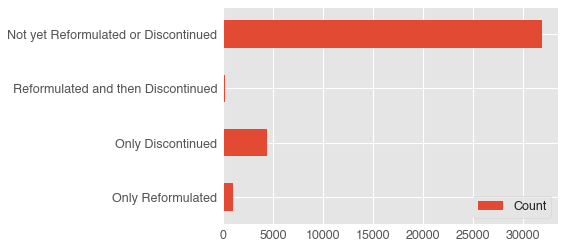

In [31]:
cols = ['Only Reformulated', 'Only Discontinued', 'Reformulated and then Discontinued', 'Not yet Reformulated or Discontinued']
clean_data_df2_for_status_bar = clean_data_df2_for_status_pie.loc[cols].copy()

clean_data_df2_for_status_bar = pd.DataFrame(clean_data_df2_for_status_bar, columns=['Count'])
clean_data_df2_for_status_bar.plot.barh()

Text(0, 0.5, '')

Text(0.5, 1.0, 'Breakdown on Status of Products\n(36,794 Total)')

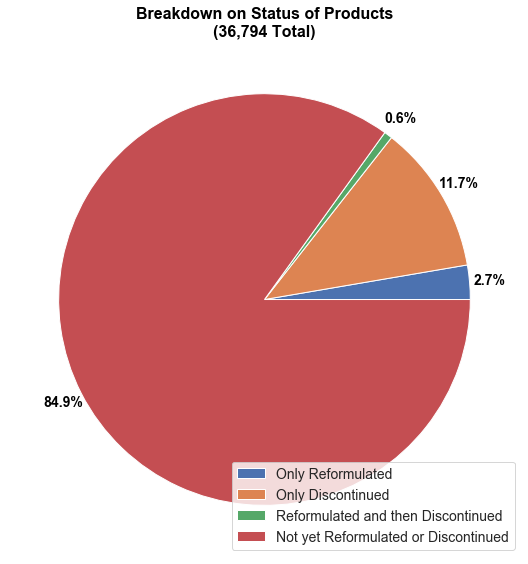

In [101]:
# Plot pie chart for product status
clean_data_df2_for_status_pie2 = clean_data_df2_for_status_bar / 37478
ax = clean_data_df2_for_status_pie2.plot.pie(y='Count', autopct='%1.1f%%', figsize=(10, 8), 
                                            textprops={'fontsize': 14, 'color': 'black', 'weight':'bold'},
                                            pctdistance=1.1, labels=None)
ax.set_ylabel('')
ax.set_title(label='Breakdown on Status of Products\n(36,794 Total)',
             size=16, color='black', weight='bold')
ax.legend(labels=clean_data_df2_for_status_pie2.index, loc='lower right', fontsize=14)
plt.tight_layout()
plt.savefig('images/pie_product_status')

In [33]:
clean_data_df2_for_status_pie['% Reformulated Only'] = clean_data_df2_for_status_pie['Only Reformulated'] / clean_data_df2_for_status_pie['Count']
clean_data_df2_for_status_pie['% Discontinued Only'] = clean_data_df2_for_status_pie['Only Discontinued'] / clean_data_df2_for_status_pie['Count']
clean_data_df2_for_status_pie['% Reformulated and then Discontinued'] = clean_data_df2_for_status_pie['Reformulated and then Discontinued'] / clean_data_df2_for_status_pie['Count']
clean_data_df2_for_status_pie['% Not yet Reformulated or Discontinued'] = clean_data_df2_for_status_pie['Not yet Reformulated or Discontinued'] / clean_data_df2_for_status_pie['Count']
clean_data_df2_for_status_pie

Count                                     37478.000000
Reformulated                               1250.000000
Discontinued                               4636.000000
Only Reformulated                          1008.000000
Only Discontinued                          4394.000000
Reformulated or Discontinued               5644.000000
Reformulated and then Discontinued          242.000000
Not yet Reformulated or Discontinued      31834.000000
% Reformulated Only                           0.026896
% Discontinued Only                           0.117242
% Reformulated and then Discontinued          0.006457
% Not yet Reformulated or Discontinued        0.849405
dtype: float64

# Analyzing Top Chemicals

In [35]:
chemicals_count_df = dce.get_count_by_mult_df_sorted_count(clean_data_df2, 'CDPHId', ['ChemicalName'])
chemicals_count_df.head(15)
top_10_chemicals = list(chemicals_count_df.head(10)['ChemicalName'])
chemicals_top10_df = clean_data_df2[clean_data_df2['ChemicalName'].isin(top_10_chemicals)]

,ChemicalName,CDPHId
110,Titanium dioxide,31867
102,"Silica, crystalline (airborne particles of res...",1340
40,Cocamide diethanolamine,898
97,"Retinol/retinyl esters, when in daily dosages ...",726
29,Carbon black,712
76,Mica,668
107,Talc,575
99,Retinyl palmitate,518
24,Butylated hydroxyanisole,408
118,Vitamin A palmitate,407


In [36]:
chemicals_top10_df['ChemicalName'].unique()

array(['Titanium dioxide', 'Cocamide diethanolamine',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black', 'Retinyl palmitate', 'Mica', 'Talc'], dtype=object)

In [37]:
chemicals_top10_count_df = chemicals_top10_df.loc[:, ['CDPHId', 'ChemicalName', 'Discontinued', 'Only Reformulated']].drop_duplicates().copy()
chemicals_top10_count_df.drop(columns=['CDPHId'], inplace=True)

chemicals_top10_count_df = chemicals_top10_count_df.groupby('ChemicalName').sum()
chemicals_top10_count_df = chemicals_top10_count_df.rename(index=
                                                           {'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.':
                                                            'Retinol/retinyl esters',
                                                           'Silica, crystalline (airborne particles of respirable size)': 
                                                            'Silica, crystalline (airborne particles)'})

chemicals_top10_count_df = chemicals_top10_count_df.sort_values('Only Reformulated', ascending=True)

Text(0.5, 1.0, 'Number of Products by Chemical')

Text(0.5, 0, 'Number of Products')

Text(0, 0.5, 'Chemical Name')

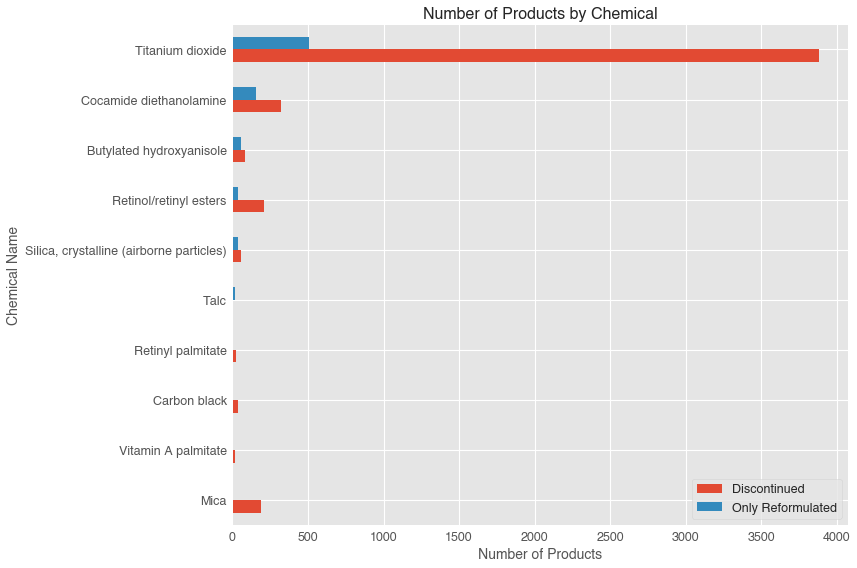

In [38]:
ax = chemicals_top10_count_df.plot.barh(figsize=(12,8))
ax.legend(loc='lower right')
ax.set_title('Number of Products by Chemical', size=16)
ax.set_xlabel('Number of Products', size=14)
ax.set_ylabel('Chemical Name', size=14)
plt.tight_layout()
plt.savefig('images/bar_top10_chemicals')

## Analyzing by DiscontinuedDate

In [39]:
# Count number of products by DiscontinuedDate Month
discontinued_date_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'DiscontinuedDate')
discontinued_date_count_df = discontinued_date_count_df.groupby(pd.Grouper(freq='M')).sum()
discontinued_date_count_df.index = discontinued_date_count_df.index.map(lambda x: x.strftime('%Y-%m'))
discontinued_date_count_df.sort_values('CDPHId', ascending=False)

,CDPHId
2013-07,369
2016-10,341
2010-12,190
2010-08,175
2015-04,144
...,...
2003-06,0
2003-04,0
2003-03,0
2003-02,0


Text(0.5, 1.0, 'Number of Products Discontinued Over Time')

Text(0.5, 0, 'Time by Month')

Text(0, 0.5, 'Number of Products Discontinued')

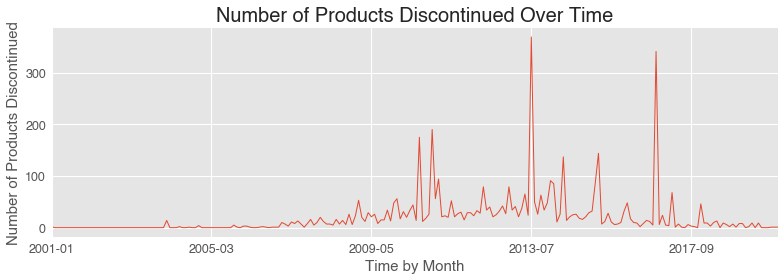

In [40]:
fig, ax = plt.subplots(figsize=(11, 4))
discontinued_date_count_df['CDPHId'].plot(ax=ax, linewidth=1);
ax.set_title('Number of Products Discontinued Over Time', fontsize=20)
ax.set_xlabel('Time by Month', fontsize=15)
ax.set_ylabel('Number of Products Discontinued', fontsize=15)
fig.tight_layout()
fig.savefig('images/num_products_discontinued_over_time_monthly')

### Analyzing Peak DiscontinuedDates
1. 2013-07, 369 products
2. 2016-10, 341 products

In [41]:
# Count df of peak DiscontinuedDates - 1. 2013-07, 369 products
peak_discontinued_df1 = clean_data_df[clean_data_df['DiscontinuedDate'].astype(str).str.contains('2013-07')]
peak_discontinued_df1['Cleaned_CompanyName'].unique()

array(['dermalogica', 'noevir co ltd', 'buth-na-bodhaige inc',
       'dhc usa inc', 'levlad llc', "burt's bees inc", 'guerlain',
       'arcadia beauty labs llc', 'the procter & gamble company',
       'new avon llc', 'yves rocher inc', 'crabtree & evelyn ltd',
       'la prairie inc', "trader joe's company"], dtype=object)

In [42]:
# Count number of discontinued products at peak time by Company Name - 1. 2013-07, 369 products
peak_discontinued_company_count_df1 = dce.get_count_by_df(peak_discontinued_df1, 'CDPHId', 'Cleaned_CompanyName')
peak_discontinued_company_count_df1 = peak_discontinued_company_count_df1.reset_index().sort_values('CDPHId', ascending=False)

Text(0.5, 1.0, 'Number of Products Discontinued by Company in July 2013')

Text(0.5, 0, 'Number of Products Discontinued')

Text(0, 0.5, 'Company Name')

Text(332.02, 0.0, '332')

Text(11.02, 1.0, '11')

Text(10.02, 2.0, '10')

Text(3.02, 3.0, '3')

Text(2.02, 4.0, '2')

Text(2.02, 5.0, '2')

Text(2.02, 6.0, '2')

Text(1.02, 7.0, '1')

Text(1.02, 8.0, '1')

Text(1.02, 9.0, '1')

Text(1.02, 10.0, '1')

Text(1.02, 11.0, '1')

Text(1.02, 12.0, '1')

Text(1.02, 13.0, '1')

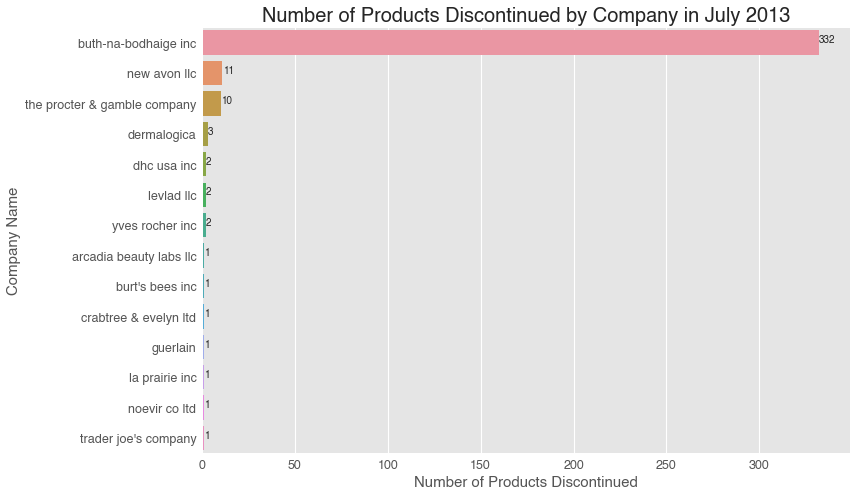

In [43]:
# Plot number of products by Company Name
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=peak_discontinued_company_count_df1, x='CDPHId', y='Cleaned_CompanyName', 
                orient = 'h')
ax.set_title('Number of Products Discontinued by Company in July 2013', fontsize=20)
ax.set_xlabel('Number of Products Discontinued', fontsize=15)
ax.set_ylabel('Company Name', fontsize=15)

for datum, p in zip(peak_discontinued_company_count_df1['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_discontinued_by_company_jul2013')

In [44]:
# Count df of peak DiscontinuedDates - 2. 2016-10, 341 products
peak_discontinued_df2 = clean_data_df[clean_data_df['DiscontinuedDate'].astype(str).str.contains('2016-10')]
peak_discontinued_df2['Cleaned_CompanyName'].unique()

array(['the procter & gamble company', 'levlad llc',
       'elizabeth arden inc', 'zo skin health inc', 'yves rocher inc',
       'guerlain'], dtype=object)

In [45]:
# Count number of discontinued products at peak time by Company Name - 2. 2016-10, 341 products
peak_discontinued_company_count_df2 = dce.get_count_by_df(peak_discontinued_df2, 'CDPHId', 'Cleaned_CompanyName')
peak_discontinued_company_count_df2 = peak_discontinued_company_count_df2.reset_index().sort_values('CDPHId', ascending=False)

Text(0.5, 1.0, 'Number of Products Discontinued by Company in Oct 2016')

Text(0.5, 0, 'Number of Products Discontinued')

Text(0, 0.5, 'Company Name')

Text(300.02, 0.0, '300')

Text(14.02, 1.0, '14')

Text(13.02, 2.0, '13')

Text(10.02, 3.0, '10')

Text(2.02, 4.0, '2')

Text(2.02, 5.0, '2')

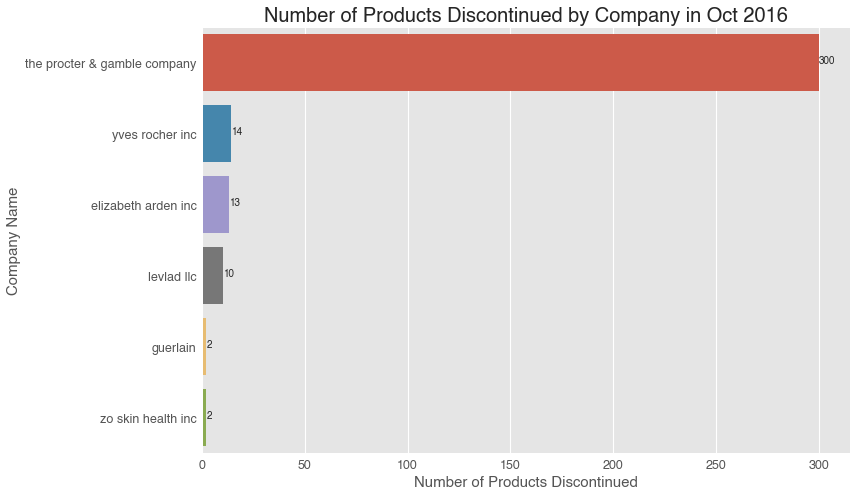

In [46]:
# Plot number of products by Company Name
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=peak_discontinued_company_count_df2, x='CDPHId', y='Cleaned_CompanyName', 
                orient = 'h')
ax.set_title('Number of Products Discontinued by Company in Oct 2016', fontsize=20)
ax.set_xlabel('Number of Products Discontinued', fontsize=15)
ax.set_ylabel('Company Name', fontsize=15)

for datum, p in zip(peak_discontinued_company_count_df2['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_discontinued_by_company_oct2016')

## Analyzing Discontinued Products

### Time to Discontinuation

In [47]:
# Get df WITH ONLY NON-NULL DISCONTINUED DATES
discontinued_df = clean_data_df[clean_data_df['DiscontinuedDate'].isna() == False].copy()
discontinued_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew


In [48]:
discontinued_df.groupby('Cleaned_CompanyName')

In [49]:
company_count_all_discontinued_df = dce.get_count_by_df_sorted_count(discontinued_df, 'CDPHId', 'Cleaned_CompanyName')
company_count_all_discontinued_df.head(10)
company_count_over_200_discontinued_df = company_count_all_discontinued_df[company_count_all_discontinued_df['CDPHId'] > 200]

,Cleaned_CompanyName,CDPHId
164,the procter & gamble company,578
25,buth-na-bodhaige inc,454
113,new avon llc,329
182,yves rocher inc,243
177,victoria's secret beauty,240
7,arbonne international llc,188
94,maesa llc,173
51,elizabeth arden inc,167
63,guerlain,138
75,kanebo cosmetics inc,129


Text(0.5, 1.0, 'Overall Number of Products Discontinued by Company (Top 5)')

Text(0.5, 0, 'Number of Products Discontinued ')

Text(0, 0.5, 'Company Name')

Text(578.02, 0.0, '578')

Text(454.02, 1.0, '454')

Text(329.02, 2.0, '329')

Text(243.02, 3.0, '243')

Text(240.02, 4.0, '240')

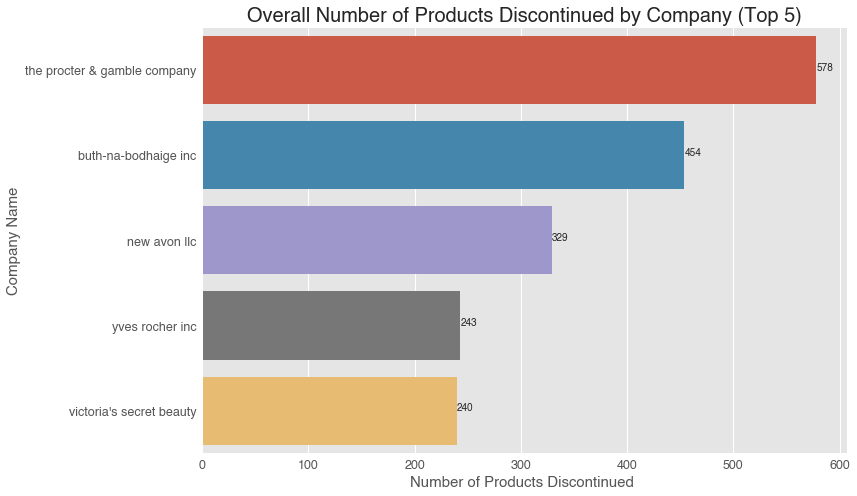

In [50]:
# Plot number of products by Company Name
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=company_count_over_200_discontinued_df, x='CDPHId', y='Cleaned_CompanyName', 
                 orient = 'h')
ax.set_title('Overall Number of Products Discontinued by Company (Top 5)', fontsize=20)
ax.set_xlabel('Number of Products Discontinued ', fontsize=15)
ax.set_ylabel('Company Name', fontsize=15)

for datum, p in zip(company_count_over_200_discontinued_df['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_discontinued_by_company_barchart')

In [51]:
discontinued_df.shape
# Drop duplicate rows before plotting
discontinued_drop_dupes_df = discontinued_df.drop_duplicates(['CDPHId', 'InitialDateReported', 'DiscontinuedDate']).copy()
discontinued_drop_dupes_df.shape

(6047, 18)

(4556, 18)

In [52]:
discontinued_drop_dupes_df['Days_to_Discontinued'] = (discontinued_drop_dupes_df['DiscontinuedDate'] - discontinued_drop_dupes_df['InitialDateReported']).dt.days
discontinued_drop_dupes_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName,Days_to_Discontinued
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon,594
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon,572
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon,480
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon,926
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew,1157


In [53]:
# Only look at products discontinued after being reported
discontinued_drop_dupes_df = discontinued_drop_dupes_df[discontinued_drop_dupes_df['Days_to_Discontinued'] >= 0]

60


(array([380.,  86.,  93.,  61., 243.,  74., 127., 274., 176.,  91., 113.,
        108.,  79.,  94.,  91., 131.,  63.,  56.,  79.,  85., 136., 153.,
        167.,  50.,  37.,  37.,  35.,  20., 134.,  15.,  24.,  25.,  10.,
         30.,  13.,   8.,  14.,   3.,  11.,   4.,  13.,  11.,  15., 184.,
          3.,   1.,   1.,   2.,   0.,   1.,   0.,   3.,   2.,   3.,   0.,
          5.,   5.,   4.,   1.,   2.]),
 array([   0. ,   58.6,  117.2,  175.8,  234.4,  293. ,  351.6,  410.2,
         468.8,  527.4,  586. ,  644.6,  703.2,  761.8,  820.4,  879. ,
         937.6,  996.2, 1054.8, 1113.4, 1172. , 1230.6, 1289.2, 1347.8,
        1406.4, 1465. , 1523.6, 1582.2, 1640.8, 1699.4, 1758. , 1816.6,
        1875.2, 1933.8, 1992.4, 2051. , 2109.6, 2168.2, 2226.8, 2285.4,
        2344. , 2402.6, 2461.2, 2519.8, 2578.4, 2637. , 2695.6, 2754.2,
        2812.8, 2871.4, 2930. , 2988.6, 3047.2, 3105.8, 3164.4, 3223. ,
        3281.6, 3340.2, 3398.8, 3457.4, 3516. ]),
 <a list of 60 Patch objects>)

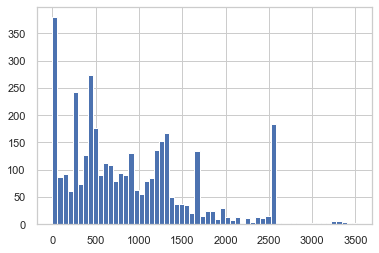

In [128]:
binsize = int(np.sqrt(discontinued_drop_dupes_df.shape[0]))
print(binsize)
fig, ax = plt.subplots()
ax.hist(discontinued_drop_dupes_df['Days_to_Discontinued'], bins=binsize)
fig.savefig('images/hist_days_to_discontinued')
# ax.hist(discontinued_drop_dupes_df['Days_to_Discontinued'], bins=binsize)

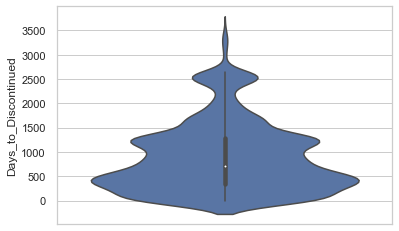

In [130]:
sns.set(style="whitegrid")
ax = sns.violinplot(discontinued_drop_dupes_df['Days_to_Discontinued'], orient='v')

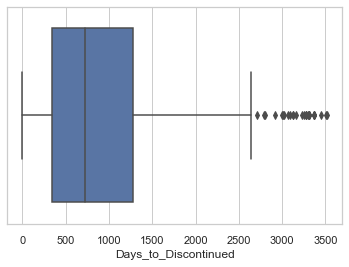

In [127]:
sns.set(style="whitegrid")
ax = sns.boxplot(discontinued_drop_dupes_df['Days_to_Discontinued'])

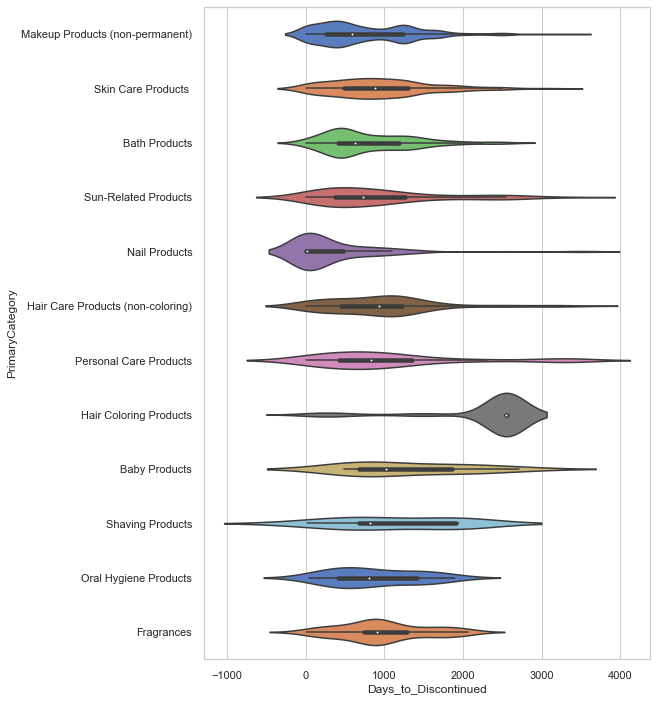

In [56]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.set(style="whitegrid")
ax = sns.violinplot(y="PrimaryCategory", x="Days_to_Discontinued",
                    data=discontinued_drop_dupes_df, palette="muted")

In [57]:
discontinued_2_companies_df = discontinued_drop_dupes_df[discontinued_drop_dupes_df['Cleaned_CompanyName'].str.contains('the procter & gamble company') | discontinued_drop_dupes_df['Cleaned_CompanyName'].str.contains('buth-na-bodhaige inc')].copy()
discontinued_2_companies_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName,Days_to_Discontinued
1596,658,77,6,Bath Products,159,162,Cocamide diethanolamine,2009-09-10,2014-02-13,2011-02-11,2009-09-10,2009-09-21,2009-09-21,0,buth-na-bodhaige inc,love etc body wash,body washes and soaps,the body shop,519
1682,745,86,90,Skin Care Products,102,656,Titanium dioxide,2009-09-11,2017-05-10,2011-04-01,2009-09-11,2009-09-11,NaT,1,the procter & gamble company,olay body quench therapy repair concentrate,skin moisturizers (making a cosmetic claim),olay,567
2625,872,86,90,Skin Care Products,102,656,Titanium dioxide,2009-09-15,2017-05-10,2015-07-01,2009-09-15,2009-09-15,NaT,1,the procter & gamble company,olay body quench plus firming reviver body lotion,skin moisturizers (making a cosmetic claim),olay,2115
2628,879,86,6,Bath Products,159,656,Titanium dioxide,2009-09-15,2017-05-11,2011-03-01,2009-09-15,2009-09-15,NaT,1,the procter & gamble company,zest aqua bar,body washes and soaps,zest,532
2629,880,86,6,Bath Products,159,656,Titanium dioxide,2009-09-15,2017-05-11,2011-08-01,2009-09-15,2009-09-15,NaT,1,the procter & gamble company,zest aloe splash with aloe bar,body washes and soaps,zest,685


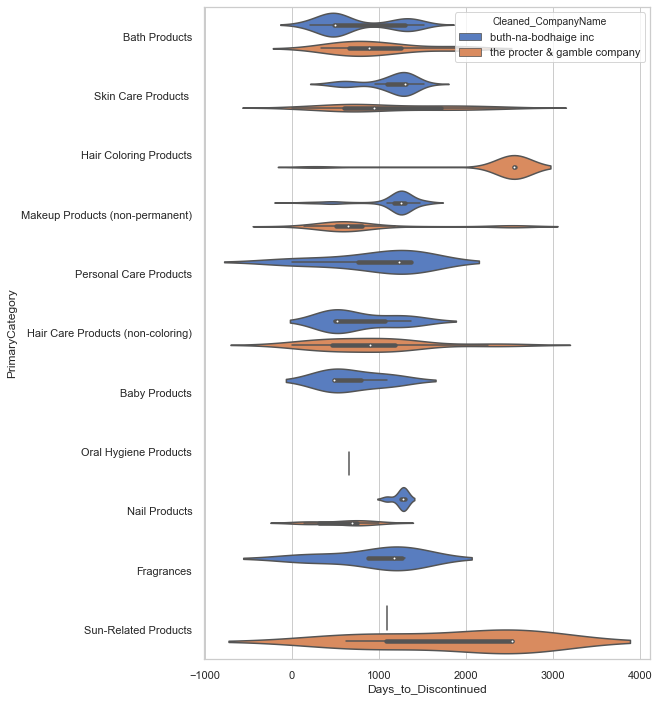

In [58]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.set(style="whitegrid")
ax = sns.violinplot(y="PrimaryCategory", x="Days_to_Discontinued",
                    hue="Cleaned_CompanyName",
                    data=discontinued_2_companies_df, palette="muted")

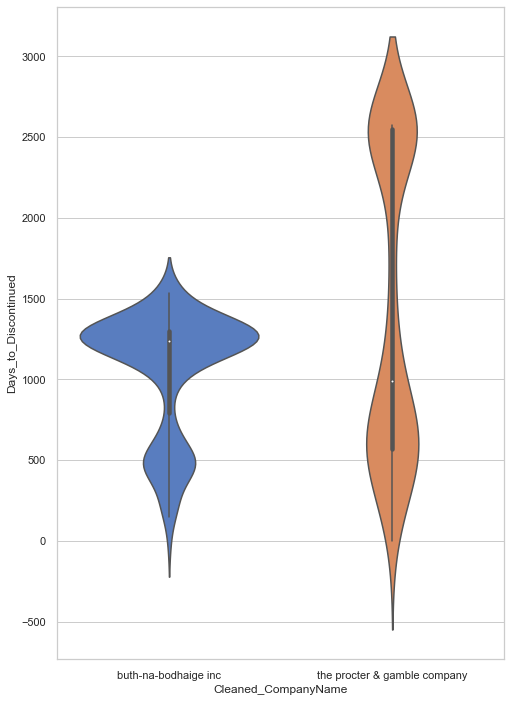

In [59]:
fig, ax = plt.subplots(figsize=(8, 12))
sns.set(style="whitegrid")
ax = sns.violinplot(x="Cleaned_CompanyName", y="Days_to_Discontinued",
                    data=discontinued_2_companies_df, palette="muted")

Text(0.5, 1.0, 'Overall \nDistribution of Days to Product Discontinuation')

Text(0, 0.5, 'Number of Days')

Text(0.5, 0, 'All Companies')

Text(0.5, 1.0, 'Buth-Na-Bodhaige vs Proctor & Gamble \nDistribution of Days to Product Discontinuation')

Text(0, 0.5, 'Number of Days')

Text(0.5, 0, 'Company')

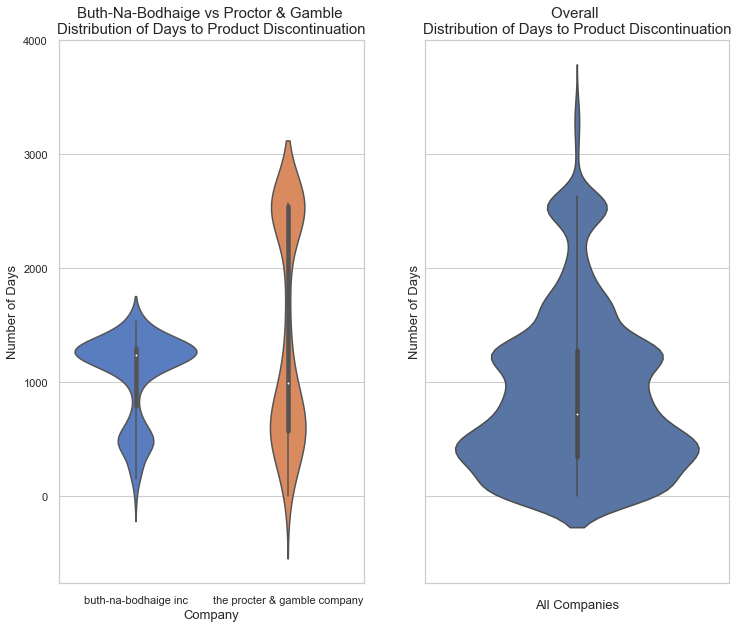

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10), sharey=True)
sns.set(style="whitegrid")
sns.violinplot(discontinued_drop_dupes_df['Days_to_Discontinued'], ax=axs[1], orient='v')
sns.violinplot(ax=axs[0], x="Cleaned_CompanyName", y="Days_to_Discontinued",
                    data=discontinued_2_companies_df, palette="muted")

axs[1].set_title('Overall \nDistribution of Days to Product Discontinuation', size=15)
axs[1].set_ylabel('Number of Days', size=13)
axs[1].set_xlabel('All Companies', size=13)

axs[0].set_title('Buth-Na-Bodhaige vs Proctor & Gamble \nDistribution of Days to Product Discontinuation', size=15)
axs[0].set_ylabel('Number of Days', size=13)
axs[0].set_xlabel('Company', size=13)

fig.savefig('images/violin_days_to_discontinued')

# Hypothesis Testing: Comparing Time to Product Discontinuation

**Null Hypothesis:** The Proctor & Gamble Company's time to product discontinuation is less than Buth-Na-Bodhaige Inc's.

**Alternate Hypothesis:** The Proctor & Gamble Company's time to product discontinuation is greater than Buth-Na-Bodhaige Inc's.

## Non-Parametrics: Mann-Whitney U Test

In [162]:
pg_times = discontinued_2_companies_df.loc[discontinued_2_companies_df['Cleaned_CompanyName'] ==  'the procter & gamble company','Days_to_Discontinued']
bnb_times = discontinued_2_companies_df.loc[discontinued_2_companies_df['Cleaned_CompanyName'] ==  'buth-na-bodhaige inc','Days_to_Discontinued']

print('pg_times:', np.mean(pg_times))
print('bnb_times:', np.mean(bnb_times))

print('pg_times:', np.median(pg_times))
print('bnb_times:', np.median(bnb_times))

res = stats.mannwhitneyu(pg_times, bnb_times, alternative="greater")
print(res)
print("p-value for Proctor & Gamble < Buth-Na-Bodhaige: {:2.3f}".format(res.pvalue))

pg_times: 1417.6561844863731
bnb_times: 1060.6379690949227
pg_times: 991.0
bnb_times: 1234.0
MannwhitneyuResult(statistic=119088.5, pvalue=0.0034702042092789828)
p-value for Proctor & Gamble < Buth-Na-Bodhaige: 0.003


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10), sharey=True)
sns.set(style="whitegrid")
sns.violinplot(discontinued_drop_dupes_df['Days_to_Discontinued'], ax=axs[0], orient='v')
sns.violinplot(ax=axs[1], x="Cleaned_CompanyName", y="Days_to_Discontinued",
                    data=discontinued_2_companies_df, palette="muted")

## Analyzing by InitialDateReported

In [61]:
# Count number of products by InitialDateReported Month
init_date_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'InitialDateReported')
init_date_count_df = init_date_count_df.groupby(pd.Grouper(freq='M')).sum()
init_date_count_df.index = init_date_count_df.index.map(lambda x: x.strftime('%Y-%m'))
init_date_count_df

,CDPHId
2009-06,1
2009-07,16
2009-08,162
2009-09,1686
2009-10,4273
...,...
2019-12,207
2020-01,221
2020-02,197
2020-03,152


Text(0.5, 1.0, 'Number of Products Reported Over Time')

Text(0.5, 0, 'Time by Month')

Text(0, 0.5, 'Number of Products Reported')

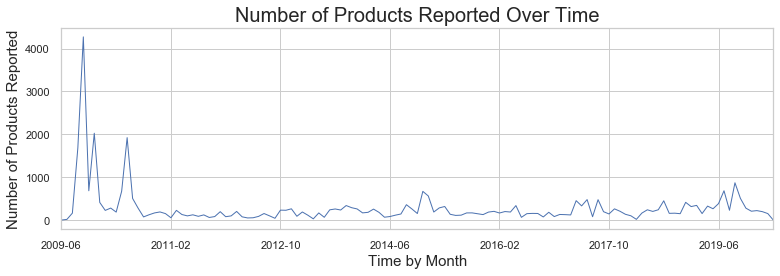

In [62]:
fig, ax = plt.subplots(figsize=(11, 4))
init_date_count_df['CDPHId'].plot(ax=ax, linewidth=1);
ax.set_title('Number of Products Reported Over Time', fontsize=20)
ax.set_xlabel('Time by Month', fontsize=15)
ax.set_ylabel('Number of Products Reported', fontsize=15)
fig.tight_layout()
fig.savefig('images/num_products_reported_over_time_monthly')

In [63]:
# Check for products with multiple InitialDateReported values
count_dupe_CDPHId = clean_data_df.drop_duplicates(['CDPHId','InitialDateReported'])
count_dupe_CDPHId = count_dupe_CDPHId['CDPHId'].value_counts()
mult_reported = count_dupe_CDPHId[count_dupe_CDPHId > 1]
print('Number of products with multiple InitialDateReported:', len(mult_reported))
mult_reported

Number of products with multiple InitialDateReported: 13


40190    5
36365    2
36362    2
37227    2
38726    2
36923    2
36902    2
38786    2
36357    2
36927    2
36367    2
36904    2
36364    2
Name: CDPHId, dtype: int64

In [64]:
# Example of products with multiple InitialDateReported values
clean_data_df[clean_data_df['CDPHId']==40190].sort_values('InitialDateReported').head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
110296,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110297,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110298,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110299,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2017-03-21,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110315,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2017-03-21,2019-10-23,NaT,2017-03-21,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury


In [65]:
clean_data_df[clean_data_df['CDPHId']==40190].sort_values('InitialDateReported').tail()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
110385,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-17,2019-10-23,NaT,2019-10-17,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110386,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2019-10-17,2019-10-23,NaT,2019-10-17,2019-10-17,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110388,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-17,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,4,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110301,40190,1154,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2019-10-23,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,2,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury
110300,40190,1154,44,Makeup Products (non-permanent),53,776,"Silica, crystalline (airborne particles of res...",2019-10-23,2019-10-23,NaT,2019-10-23,2019-10-23,NaT,2,charlotte tilbury beauty ltd,matte revolution,lip color - lipsticks liners and pencils,charlotte tilbury


## Analyzing Cosmetics Companies

In [66]:
# Count number of products by Company Name
company_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'Cleaned_CompanyName')
company_count_df = company_count_df.reset_index().sort_values('CDPHId', ascending=False)
company_count_df

company_count_over500_df = company_count_df[company_count_df['CDPHId'] > 500]

,Cleaned_CompanyName,CDPHId
23,american international industries,1964
353,nail alliance - entity,1583
450,revlon consumer product corporation,1458
24,amorepacific us inc,1067
285,l'oreal usa,1051
...,...,...
378,novelty inc,1
487,smith & vandiver corporation,1
119,cool cuts 4 kids,1
485,smart brands inc,1


In [67]:
clean_data_df.iloc[company_count_over500_df.index][['Cleaned_CompanyName', 'PrimaryCategory', 'Cleaned_SubCategory']].drop_duplicates()

,Cleaned_CompanyName,PrimaryCategory,Cleaned_SubCategory
39,entity beauty inc,Nail Products,uv gel nail polish
519,sunrider manufacturing lp,Skin Care Products,skin moisturizers (making a cosmetic claim)
617,revlon consumer product corporation,Makeup Products (non-permanent),eye shadow
40,entity beauty inc,Nail Products,basecoats and undercoats
451,revlon consumer product corporation,Makeup Products (non-permanent),lip color - lipsticks liners and pencils
42,entity beauty inc,Nail Products,artificial nails and related products
382,new avon llc,Makeup Products (non-permanent),eye shadow
292,revlon consumer product corporation,Makeup Products (non-permanent),foundations and bases
520,sunrider manufacturing lp,Sun-Related Products,sunscreen (making a cosmetic claim)
49,dermalogica,Bath Products,scrubs and exfoliants


Text(0.5, 1.0, 'Number of Products Reported by Company')

Text(0.5, 0, 'Number of Products Reported')

Text(0, 0.5, 'Company Name')

Text(1964.02, 0.0, '1964')

Text(1583.02, 1.0, '1583')

Text(1458.02, 2.0, '1458')

Text(1067.02, 3.0, '1067')

Text(1051.02, 4.0, '1051')

Text(1045.02, 5.0, '1045')

Text(902.02, 6.0, '902')

Text(824.02, 7.0, '824')

Text(756.02, 8.0, '756')

Text(743.02, 9.0, '743')

Text(727.02, 10.0, '727')

Text(695.02, 11.0, '695')

Text(672.02, 12.0, '672')

Text(615.02, 13.0, '615')

Text(560.02, 14.0, '560')

Text(553.02, 15.0, '553')

Text(514.02, 16.0, '514')

Text(513.02, 17.0, '513')

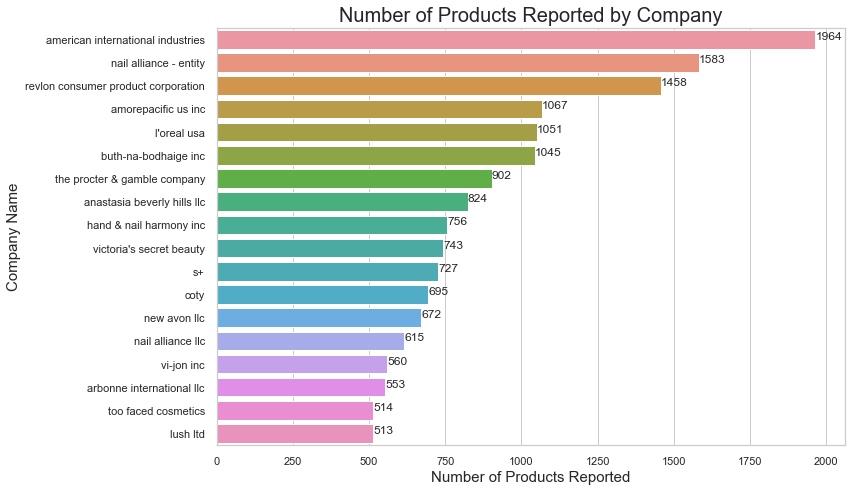

In [68]:
# Plot number of products by Company Name
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=company_count_over500_df, x='CDPHId', y='Cleaned_CompanyName', 
                 orient = 'h')
ax.set_title('Number of Products Reported by Company', fontsize=20)
ax.set_xlabel('Number of Products Reported', fontsize=15)
ax.set_ylabel('Company Name', fontsize=15)

for datum, p in zip(company_count_over500_df['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_by_company_barchart')

# Analyzing 2 Companies of Interest
* Companies with > 300 products discontinued in a month:
    1. buth-na-bodhaige inc
    2. the procter & gamble company

In [69]:
buth_bodhaige_df = clean_data_df[clean_data_df['Cleaned_CompanyName'] == 'buth-na-bodhaige inc']
buth_bodhaige_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
1596,658,77,6,Bath Products,159,162,Cocamide diethanolamine,2009-09-10,2014-02-13,2011-02-11,2009-09-10,2009-09-21,2009-09-21,0,buth-na-bodhaige inc,love etc body wash,body washes and soaps,the body shop
1597,658,77,6,Bath Products,159,162,Cocamide diethanolamine,2009-09-10,2014-02-13,2011-02-11,2009-09-21,2012-01-10,2012-01-10,0,buth-na-bodhaige inc,love etc body wash,body washes and soaps,the body shop
10650,2741,77,6,Bath Products,159,162,Cocamide diethanolamine,2009-10-08,2014-02-18,2013-07-10,2009-10-08,2012-01-10,2012-01-10,0,buth-na-bodhaige inc,satsuma shower gel,body washes and soaps,the body shop
10651,2741,77,6,Bath Products,159,162,Cocamide diethanolamine,2009-10-08,2014-02-18,2013-07-10,2009-10-08,2009-10-08,2009-10-08,0,buth-na-bodhaige inc,satsuma shower gel,body washes and soaps,the body shop
10675,2743,77,6,Bath Products,166,162,Cocamide diethanolamine,2009-10-08,2011-02-11,2011-02-03,2009-10-08,2014-02-06,2104-05-02,0,buth-na-bodhaige inc,juice it grapefruit & mandarin exfoliating bod...,scrubs and exfoliants,the body shop


In [70]:
# Count number of products by ChemicalCount
buth_bodhaige_chem_count_df = dce.get_count_by_df(buth_bodhaige_df, 'CDPHId', 'ChemicalCount')
buth_bodhaige_chem_count_df = buth_bodhaige_chem_count_df.reset_index().sort_values('CDPHId', ascending=False)
buth_bodhaige_chem_count_df

,ChemicalCount,CDPHId
1,1,996
0,0,34
2,2,15


In [71]:
loreal_df = clean_data_df[clean_data_df['Cleaned_CompanyName'] == "l'oreal usa"]
loreal_df.head()
# Count number of products by ChemicalCount
loreal_chem_count_df = dce.get_count_by_df(loreal_df, 'CDPHId', 'ChemicalCount')
loreal_chem_count_df = loreal_chem_count_df.reset_index().sort_values('CDPHId', ascending=False)
loreal_chem_count_df

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
356,198,67,12,Fragrances,165,656,Titanium dioxide,2009-08-31,2010-12-30,NaT,2009-08-31,2009-08-31,NaT,1,l'oreal usa,ysl perfumed sparkling body powder,perfumes - solids and powders,ysl
358,199,67,44,Makeup Products (non-permanent),46,656,Titanium dioxide,2009-08-31,2009-08-31,NaT,2009-08-31,2009-08-31,NaT,1,l'oreal usa,eye pen,eyeliner/eyebrow pencils,maybelline
4525,1315,67,12,Fragrances,164,656,Titanium dioxide,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1,l'oreal usa,ysl baby doll perfumed body lotion,perfumes - oils and lotions,ysl
4541,1330,67,12,Fragrances,164,656,Titanium dioxide,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,1,l'oreal usa,ysl cinema rich body creme,perfumes - oils and lotions,ysl
4647,1384,67,90,Skin Care Products,98,656,Titanium dioxide,2009-09-22,2009-09-22,NaT,2009-09-22,2009-09-22,NaT,1,l'oreal usa,ysl baby doll sparkling body powder,powders (excluding aftershave baby powder and ...,ysl


,ChemicalCount,CDPHId
0,1,1050
1,2,1


In [72]:
# Count number of products by Cosmetic Primary Category
loreal_primary_cat_count_df = dce.get_count_by_df_sorted_count(loreal_df, 'CDPHId', 'PrimaryCategory')
loreal_primary_cat_count_df

,PrimaryCategory,CDPHId
4,Makeup Products (non-permanent),608
8,Skin Care Products,188
3,Hair Coloring Products,149
9,Sun-Related Products,78
2,Hair Care Products (non-coloring),55
5,Nail Products,16
0,Bath Products,10
1,Fragrances,6
6,Personal Care Products,2
7,Shaving Products,2


In [73]:
proctor_gamble_df = clean_data_df[clean_data_df['Cleaned_CompanyName'] == 'the procter & gamble company']
proctor_gamble_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
1680,741,86,6,Bath Products,159,656,Titanium dioxide,2009-09-11,2017-05-11,2008-08-01,2009-09-11,2009-09-11,NaT,1,the procter & gamble company,zest spring burst bar,body washes and soaps,zest
1681,744,86,6,Bath Products,159,656,Titanium dioxide,2009-09-11,2015-08-21,NaT,2009-09-11,2015-08-21,NaT,1,the procter & gamble company,olay sensitive bar soap,body washes and soaps,olay
1682,745,86,90,Skin Care Products,102,656,Titanium dioxide,2009-09-11,2017-05-10,2011-04-01,2009-09-11,2009-09-11,NaT,1,the procter & gamble company,olay body quench therapy repair concentrate,skin moisturizers (making a cosmetic claim),olay
1683,747,86,6,Bath Products,159,656,Titanium dioxide,2009-09-11,2016-10-19,NaT,2009-09-11,2016-10-19,NaT,1,the procter & gamble company,olay daily moisture quench bar soap,body washes and soaps,olay
2625,872,86,90,Skin Care Products,102,656,Titanium dioxide,2009-09-15,2017-05-10,2015-07-01,2009-09-15,2009-09-15,NaT,1,the procter & gamble company,olay body quench plus firming reviver body lotion,skin moisturizers (making a cosmetic claim),olay


In [74]:
# Count number of products by ChemicalCount
proctor_gamble_chem_count_df = dce.get_count_by_df(proctor_gamble_df, 'CDPHId', 'ChemicalCount')
proctor_gamble_chem_count_df = proctor_gamble_chem_count_df.reset_index().sort_values('CDPHId', ascending=False)
proctor_gamble_chem_count_df

,ChemicalCount,CDPHId
1,1,897
2,2,16
0,0,1


In [75]:
# Count number of products by Cosmetic Primary Category
proctor_gamble_primary_cat_count_df = dce.get_count_by_df_sorted_count(proctor_gamble_df, 'CDPHId', 'PrimaryCategory')
proctor_gamble_primary_cat_count_df

,PrimaryCategory,CDPHId
3,Makeup Products (non-permanent),283
5,Oral Hygiene Products,174
7,Skin Care Products,170
2,Hair Coloring Products,156
1,Hair Care Products (non-coloring),52
0,Bath Products,42
8,Sun-Related Products,40
4,Nail Products,11
6,Shaving Products,6


## Analyzing Chemical Counts

In [76]:
# Count number of products by ChemicalCount
chemical_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'ChemicalCount')
chemical_count_df = chemical_count_df.reset_index().sort_values('CDPHId', ascending=False)
chemical_count_df

,ChemicalCount,CDPHId
1,1,32321
2,2,3684
0,0,598
3,3,350
4,4,85
5,5,10
7,7,4
8,8,4
6,6,2
9,9,1


Text(0.5, 1.0, 'Number of Products Per Chemical Count')

Text(0.5, 0, 'Chemical Count')

Text(0, 0.5, 'Number of Products')

Text(0, 4, '32321')

Text(0, 4, '3684')

Text(0, 4, '598')

Text(0, 4, '350')

Text(0, 4, '85')

Text(0, 4, '10')

Text(0, 4, '4')

Text(0, 4, '4')

Text(0, 4, '2')

Text(0, 4, '1')

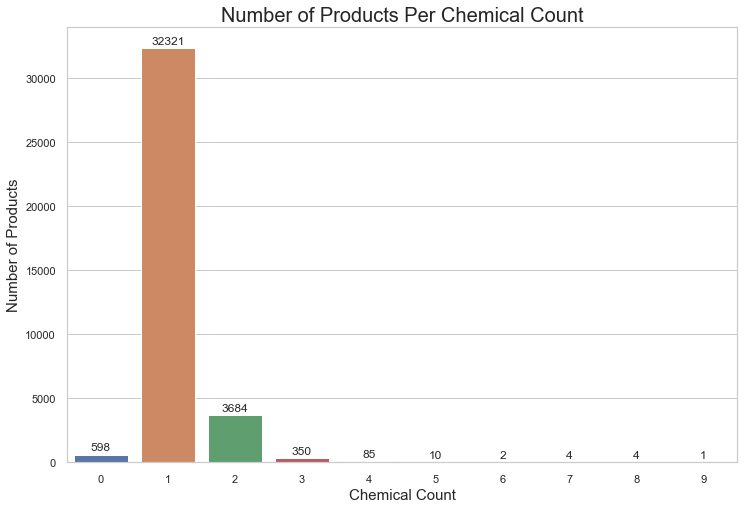

In [77]:
x = chemical_count_df['ChemicalCount']
y = chemical_count_df['CDPHId']

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x, y)
ax.set_title('Number of Products Per Chemical Count', fontsize=20)
ax.set_xlabel('Chemical Count', fontsize=15)
ax.set_ylabel('Number of Products', fontsize=15)

for x_i, y_i in zip(x, y):
    ax.annotate(y_i, (x_i, y_i), textcoords="offset points", xytext=(0,4), ha='center')
    
fig.savefig('images/num_products_per_chemical_count_barchart')

## Analyzing Cosmetics Primary Categories

In [78]:
# Count number of products by Primary Category
primary_category_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'PrimaryCategory')
primary_category_count_df = primary_category_count_df.reset_index().sort_values('CDPHId', ascending=False)
primary_category_count_df

,PrimaryCategory,CDPHId
5,Makeup Products (non-permanent),17994
6,Nail Products,6902
10,Skin Care Products,5164
1,Bath Products,2412
11,Sun-Related Products,1768
3,Hair Care Products (non-coloring),1244
4,Hair Coloring Products,803
2,Fragrances,433
8,Personal Care Products,432
7,Oral Hygiene Products,372


Text(0.5, 1.0, 'Number of Products by Primary Category')

Text(0.5, 0, 'Number of Products Reported')

Text(0, 0.5, 'Primary Category')

Text(17994.02, 0.0, '17994')

Text(6902.02, 1.0, '6902')

Text(5164.02, 2.0, '5164')

Text(2412.02, 3.0, '2412')

Text(1768.02, 4.0, '1768')

Text(1244.02, 5.0, '1244')

Text(803.02, 6.0, '803')

Text(433.02, 7.0, '433')

Text(432.02, 8.0, '432')

Text(372.02, 9.0, '372')

Text(263.02, 10.0, '263')

Text(177.02, 11.0, '177')

Text(46.02, 12.0, '46')

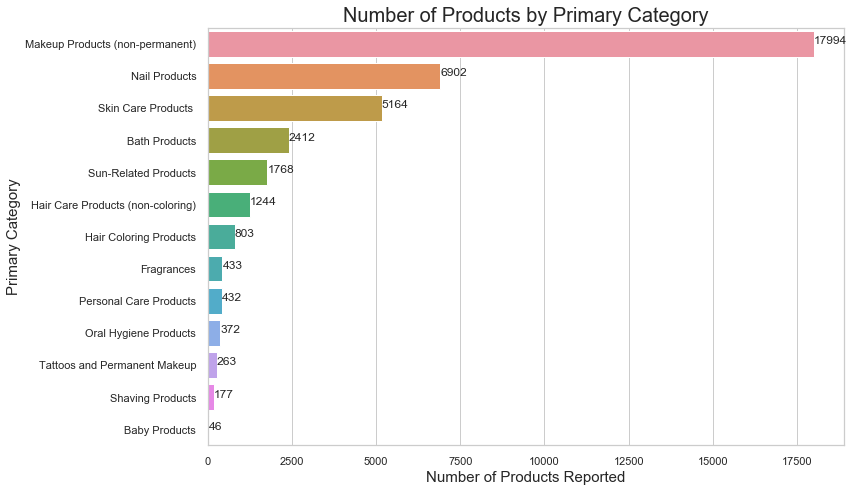

In [79]:
# Plot number of products by Primary Category
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=primary_category_count_df, x='CDPHId', y='PrimaryCategory', 
                 orient = 'h')
ax.set_title('Number of Products by Primary Category', fontsize=20)
ax.set_xlabel('Number of Products Reported', fontsize=15)
ax.set_ylabel('Primary Category', fontsize=15)

for datum, p in zip(primary_category_count_df['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_by_primary_cat_barchart')

## Analyzing Cosmetics Sub Categories

In [80]:
# Count number of products by Sub Category
sub_category_count_df = dce.get_count_by_df(clean_data_df, 'CDPHId', 'Cleaned_SubCategory')
sub_category_count_df = sub_category_count_df.reset_index().sort_values('CDPHId', ascending=False)
sub_category_count_df

sub_category_count_over500_df = sub_category_count_df[sub_category_count_df['CDPHId'] > 500]

,Cleaned_SubCategory,CDPHId
18,eye shadow,3493
49,nail polish and enamel,3362
25,foundations and bases,3162
40,lip color - lipsticks liners and pencils,3069
88,uv gel nail polish,2454
...,...,...
59,other oral hygiene product,3
3,antiperspirants (making a cosmetic claim),3
23,feminine deodorants,3
52,other baby products,2


In [81]:
clean_data_df.iloc[sub_category_count_over500_df.index]['PrimaryCategory'].unique()

array(['Makeup Products (non-permanent)', 'Nail Products',
       'Skin Care Products ', 'Sun-Related Products',
       'Hair Care Products (non-coloring)'], dtype=object)

Text(0.5, 1.0, 'Number of Products by Sub Category')

Text(0.5, 0, 'Number of Products Reported')

Text(0, 0.5, 'Sub Category')

Text(3493.02, 0.0, '3493')

Text(3362.02, 1.0, '3362')

Text(3162.02, 2.0, '3162')

Text(3069.02, 3.0, '3069')

Text(2454.02, 4.0, '2454')

Text(2376.02, 5.0, '2376')

Text(2146.02, 6.0, '2146')

Text(1821.02, 7.0, '1821')

Text(1679.02, 8.0, '1679')

Text(1532.02, 9.0, '1532')

Text(1495.02, 10.0, '1495')

Text(1204.02, 11.0, '1204')

Text(863.02, 12.0, '863')

Text(713.02, 13.0, '713')

Text(703.02, 14.0, '703')

Text(680.02, 15.0, '680')

Text(665.02, 16.0, '665')

Text(647.02, 17.0, '647')

Text(624.02, 18.0, '624')

Text(577.02, 19.0, '577')

Text(505.02, 20.0, '505')

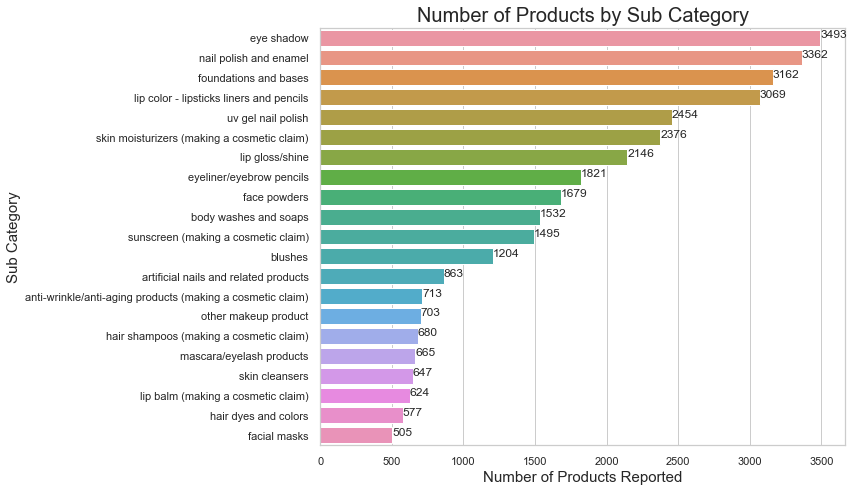

In [82]:
# Plot number of products by Sub Category
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(data=sub_category_count_over500_df, x='CDPHId', y='Cleaned_SubCategory', 
                 orient = 'h')
ax.set_title('Number of Products by Sub Category', fontsize=20)
ax.set_xlabel('Number of Products Reported', fontsize=15)
ax.set_ylabel('Sub Category', fontsize=15)

for datum, p in zip(sub_category_count_over500_df['CDPHId'].sort_values(ascending=False), 
                    ax.patches):
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(datum, (x, y))

fig.tight_layout()
fig.savefig('images/num_products_by_sub_cat_barchart')

# Hypothesis Testing

Products Discontinued/Reported

buth-na-bodhaige inc: 332/
the proctor & gamble company: 

# Appendix - Additional EDA

### Investigate Products with 0 Chemicals

In [83]:
zero_chemicals_df = clean_data_df[clean_data_df['ChemicalCount'] == 0]
zero_chemicals_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�
497,333,71,6,Bath Products,159,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2013-09-16,2009-11-23,0,sunrider manufacturing lp,gentle cleanser,body washes and soaps,kandesn
498,334,71,90,Skin Care Products,93,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-02,2009-09-03,2009-09-02,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn
499,334,71,90,Skin Care Products,93,162,Cocamide diethanolamine,2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2009-09-02,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn
500,334,71,90,Skin Care Products,93,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-02,2013-09-16,NaT,2009-09-03,2013-12-05,2103-12-05,0,sunrider manufacturing lp,cleansing foam,skin cleansers,kandesn


In [84]:
zero_chemicals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 31 to 104786
Data columns (total 18 columns):
CDPHId                    770 non-null int64
CompanyId                 770 non-null int64
PrimaryCategoryId         770 non-null int64
PrimaryCategory           770 non-null object
SubCategoryId             770 non-null int64
CasId                     770 non-null int64
ChemicalName              770 non-null object
InitialDateReported       770 non-null datetime64[ns]
MostRecentDateReported    770 non-null datetime64[ns]
DiscontinuedDate          202 non-null datetime64[ns]
ChemicalCreatedAt         770 non-null datetime64[ns]
ChemicalUpdatedAt         770 non-null datetime64[ns]
ChemicalDateRemoved       770 non-null datetime64[ns]
ChemicalCount             770 non-null int64
Cleaned_CompanyName       770 non-null object
Cleaned_ProductName       770 non-null object
Cleaned_SubCategory       770 non-null object
Cleaned_BrandName         770 non-null object
dtypes: datetime64[ns

In [85]:
# Count number of 0-chemical products by CompanyName
zero_chemicals_count_companies_df = dce.get_count_by_df(zero_chemicals_df, 'CDPHId', 'Cleaned_CompanyName')
zero_chemicals_count_companies_df = zero_chemicals_count_companies_df.reset_index().sort_values('CDPHId', ascending=False)
zero_chemicals_count_companies_df.head(10)

,Cleaned_CompanyName,CDPHId
28,elizabeth arden inc,77
60,mario zunino & c srl,38
14,buth-na-bodhaige inc,34
93,vi-jon inc,33
86,sunrider manufacturing lp,31
17,cfeb sisley,25
57,lush manufacturing ltd,19
101,zotos international inc,18
76,penhaligon's limited,16
24,deb usa inc,16


### Investigate Products with 0 Chemicals

In [86]:
five_or_more_chemicals_list = [i for i in range(5,10)]
five_or_more_chemicals_df = clean_data_df[clean_data_df['ChemicalCount']
                                          .isin(five_or_more_chemicals_list)]
five_or_more_chemicals_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
2555,862,18,90,Skin Care Products,92,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2556,862,18,90,Skin Care Products,92,656,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2557,862,18,90,Skin Care Products,92,754,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2558,862,18,90,Skin Care Products,92,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss
2559,862,18,90,Skin Care Products,92,656,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5,bliss world llc,best of skintentions,anti-wrinkle/anti-aging products (making a cos...,bliss


(array([279., 177., 110.,  35.,  71.,  10.,  11.,   6.,   3.,  68.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

Text(0.5, 0, 'Cosmetics Category')

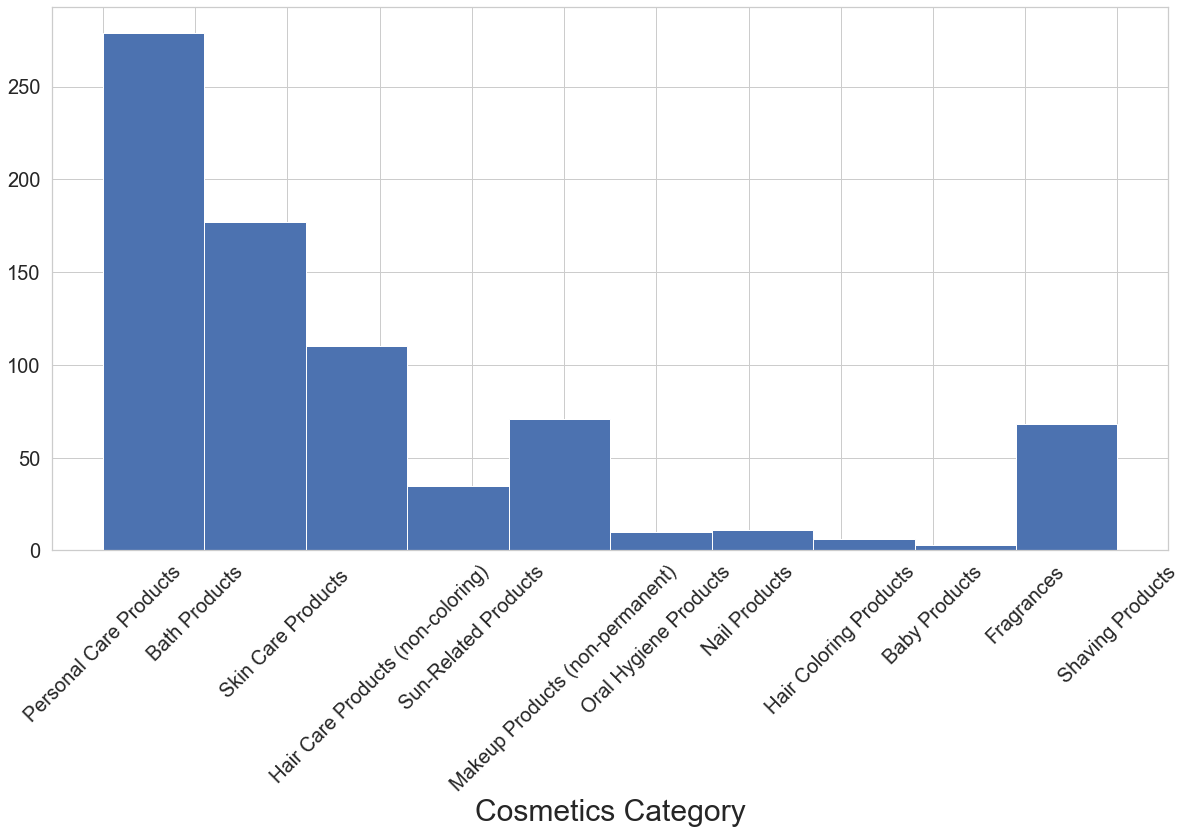

In [87]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(zero_chemicals_df['PrimaryCategory'])
plt.xticks(rotation='45')
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_xlabel('Cosmetics Category', size=30)
plt.show()

## Discontinued Products

In [88]:
discontinued_df = clean_data_df[clean_data_df['DiscontinuedDate'].isna()==False]
discontinued_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew


In [89]:
discontinued_df

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
0,2,4,44,Makeup Products (non-permanent),53,656,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,ultra color rich extra plump lipstick-all shades,lip color - lipsticks liners and pencils,avon
4,5,4,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1,new avon llc,avon brilliant shine lip gloss-all shades �,lip gloss/shine,avon
5,6,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT,1,new avon llc,jillian dempsey for avon celestial eyeshadow-a...,eye shadow,avon
30,18,4,44,Makeup Products (non-permanent),162,656,Titanium dioxide,2009-07-20,2013-08-28,2012-02-01,2009-07-20,2009-07-20,NaT,1,new avon llc,spectra lash mascara �,mascara/eyelash products,avon
381,222,4,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-09-01,2013-08-28,2012-11-01,2009-09-01,2009-09-01,NaT,2,new avon llc,anew eyelifting serum shadow-all shades �,eye shadow,anew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110044,40075,395,90,Skin Care Products,103,773,"Retinol/retinyl esters, when in daily dosages ...",2019-10-09,2019-10-09,2014-11-05,2019-10-09,2019-10-09,NaT,1,herbalife international of america inc,multivitamin toner with vitamins ac & e normal...,skin toner (making a cosmetic claim),nourifusion
110501,40251,1352,90,Skin Care Products,92,1242,Ethanol in alcoholic beverages,2019-10-30,2019-12-19,2019-12-01,2019-12-19,2019-12-19,NaT,1,sanmedica international llc,serovital complete eye area renewal complex,anti-wrinkle/anti-aging products (making a cos...,sanmedica international llc
111791,40743,784,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2019-12-30,2019-12-30,2018-01-01,2019-12-30,2019-12-30,NaT,1,soap and glory ltd,lid stuff eyeshadow palette,eye shadow,soap & glory
111805,40747,784,44,Makeup Products (non-permanent),52,656,Titanium dioxide,2019-12-30,2019-12-30,2019-01-01,2019-12-30,2019-12-30,NaT,1,soap and glory ltd,sexy mother pucker mini gloss sticks - glossed...,lip gloss/shine,soap & glory


## Reformulated Products

In [90]:
reformulated_df = clean_data_df[clean_data_df['ChemicalDateRemoved'].isna()==False]
reformulated_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�
36,29,31,106,Sun-Related Products,107,656,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1,aloecare international llc,aloe up lil' kids spf 45 aloe based sunscreen ...,sunscreen (making a cosmetic claim),aloe up lil' kids spf 45 aloe based sunscreen ...
224,71,23,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1,revlon consumer product corporation,colorstay 12 hour eye shadow quad- rose shimme...,eye shadow,revlon
431,269,69,6,Bath Products,9,656,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden
432,269,69,6,Bath Products,9,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden


### Investigate Product with 9 Chemicals

In [91]:
nine_chemicals_df = clean_data_df[clean_data_df['ChemicalCount'] == 9]
nine_chemicals_df

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
60819,22212,165,18,Hair Care Products (non-coloring),25,270,"1,4-Dioxane",2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60820,22212,165,18,Hair Care Products (non-coloring),25,9,Acrylamide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60821,22212,165,18,Hair Care Products (non-coloring),25,715,Arsenic (inorganic arsenic compounds),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60822,22212,165,18,Hair Care Products (non-coloring),25,214,Dichloroacetic acid,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60823,22212,165,18,Hair Care Products (non-coloring),25,311,Ethylene oxide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60824,22212,165,18,Hair Care Products (non-coloring),25,333,Formaldehyde (gas),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60825,22212,165,18,Hair Care Products (non-coloring),25,388,Lead,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60826,22212,165,18,Hair Care Products (non-coloring),25,1007,Cocamide diethanolamine (DEA),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line
60827,22212,165,18,Hair Care Products (non-coloring),25,305,Ethylene glycol,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9,regis corporation,moisturizing shampoo,hair shampoos (making a cosmetic claim),regis design line


In [92]:
list(nine_chemicals_df['ChemicalName'].unique())

['1,4-Dioxane',
 'Acrylamide',
 'Arsenic (inorganic arsenic compounds)',
 'Dichloroacetic acid',
 'Ethylene oxide',
 'Formaldehyde (gas)',
 'Lead',
 'Cocamide diethanolamine (DEA)',
 'Ethylene glycol']

## Analyzing Reformulated Products

### Time to Reformulation

In [93]:
# Get df WITH ONLY NON-NULL DISCONTINUED DATES
reformulation_df = clean_data_df[clean_data_df['ChemicalDateRemoved'].isna() == False]
reformulation_df.head()

,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�
36,29,31,106,Sun-Related Products,107,656,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1,aloecare international llc,aloe up lil' kids spf 45 aloe based sunscreen ...,sunscreen (making a cosmetic claim),aloe up lil' kids spf 45 aloe based sunscreen ...
224,71,23,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1,revlon consumer product corporation,colorstay 12 hour eye shadow quad- rose shimme...,eye shadow,revlon
431,269,69,6,Bath Products,9,656,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden
432,269,69,6,Bath Products,9,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden


In [94]:
reformulation_df['Days_to_Reformulated'] = (reformulation_df['ChemicalDateRemoved'] - reformulation_df['InitialDateReported']).dt.days
reformulation_df.head()

/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CDPHId,CompanyId,PrimaryCategoryId,PrimaryCategory,SubCategoryId,CasId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,Cleaned_CompanyName,Cleaned_ProductName,Cleaned_SubCategory,Cleaned_BrandName,Days_to_Reformulated
31,24,181,74,Personal Care Products,170,162,Cocamide diethanolamine,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,0,gojo industries inc,white premium lotion soap,hand cleansers and sanitizers,gojo�,525
36,29,31,106,Sun-Related Products,107,656,Titanium dioxide,2009-08-11,2009-08-11,NaT,2009-08-21,2009-08-21,2009-08-21,1,aloecare international llc,aloe up lil' kids spf 45 aloe based sunscreen ...,sunscreen (making a cosmetic claim),aloe up lil' kids spf 45 aloe based sunscreen ...,10
224,71,23,44,Makeup Products (non-permanent),48,656,Titanium dioxide,2009-08-26,2009-08-26,NaT,2009-08-26,2009-09-14,2009-09-14,1,revlon consumer product corporation,colorstay 12 hour eye shadow quad- rose shimme...,eye shadow,revlon,19
431,269,69,6,Bath Products,9,656,Titanium dioxide,2009-09-01,2017-01-12,2013-05-13,2009-09-01,2009-09-25,2009-09-25,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden,24
432,269,69,6,Bath Products,9,773,"Retinol/retinyl esters, when in daily dosages ...",2009-09-01,2017-01-12,2013-05-13,2009-09-25,2009-09-29,2009-09-29,1,elizabeth arden inc,elizabeth arden green tea relaxing bubble bath,bubble and foam bath products,elizabeth arden,28


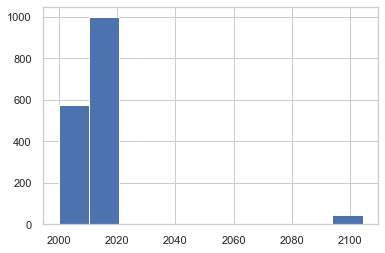

In [95]:
reformulation_df['ChemicalDateRemoved'].hist()

## Plot Product Counts by All Dates

In [96]:
clean_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46927 entries, 0 to 113779
Data columns (total 18 columns):
CDPHId                    46927 non-null int64
CompanyId                 46927 non-null int64
PrimaryCategoryId         46927 non-null int64
PrimaryCategory           46927 non-null object
SubCategoryId             46927 non-null int64
CasId                     46927 non-null int64
ChemicalName              46927 non-null object
InitialDateReported       46927 non-null datetime64[ns]
MostRecentDateReported    46927 non-null datetime64[ns]
DiscontinuedDate          6047 non-null datetime64[ns]
ChemicalCreatedAt         46927 non-null datetime64[ns]
ChemicalUpdatedAt         46927 non-null datetime64[ns]
ChemicalDateRemoved       1619 non-null datetime64[ns]
ChemicalCount             46927 non-null int64
Cleaned_CompanyName       46927 non-null object
Cleaned_ProductName       46927 non-null object
Cleaned_SubCategory       46927 non-null object
Cleaned_BrandName         46927 no

Text(0.5, 1.0, 'Number of Products Reported Over Time')

Text(0.5, 0, 'Time by Month')

Text(0, 0.5, 'Number of Products')

Text(0.5, 1.0, 'Number of Products Discontinued Over Time')

Text(0.5, 0, 'Time by Month')

Text(0, 0.5, 'Number of Products')

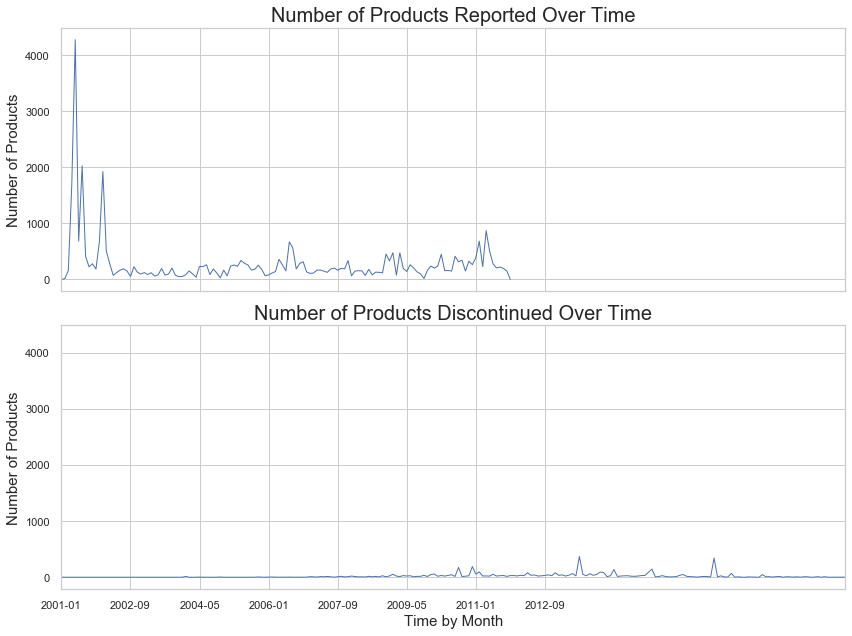

In [97]:
fig, axs = plt.subplots(2, 1, figsize=(12, 9), sharex=True, sharey=True)

x=pd.date_range('2003-05', '2020-04')

init_date_count_df['CDPHId'].plot(x=x, ax=axs[0], linewidth=1);
discontinued_date_count_df['CDPHId'].plot(x=x, ax=axs[1], linewidth=1);

axs[0].set_title('Number of Products Reported Over Time', fontsize=20)
axs[0].set_xlabel('Time by Month', fontsize=15)
axs[0].set_ylabel('Number of Products', fontsize=15)

axs[1].set_title('Number of Products Discontinued Over Time', fontsize=20)
axs[1].set_xlabel('Time by Month', fontsize=15)
axs[1].set_ylabel('Number of Products', fontsize=15)

fig.tight_layout()
fig.savefig('images/num_products_over_time_monthly')

<Figure size 864x360 with 0 Axes>

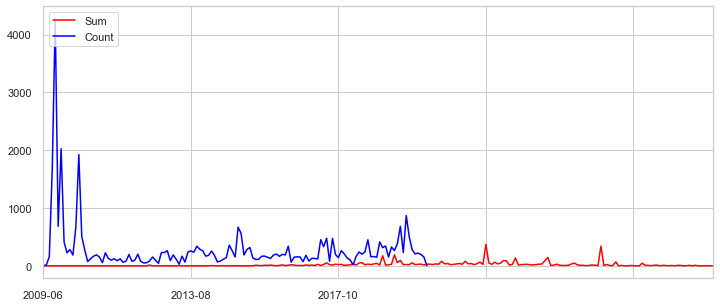

In [98]:
plt.figure(figsize=(12,5))

ax1 = discontinued_date_count_df['CDPHId'].plot(color='red', grid=True, label='Sum')
ax2 = init_date_count_df['CDPHId'].plot(color='blue', grid=True, label='Count')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

<Figure size 864x360 with 0 Axes>

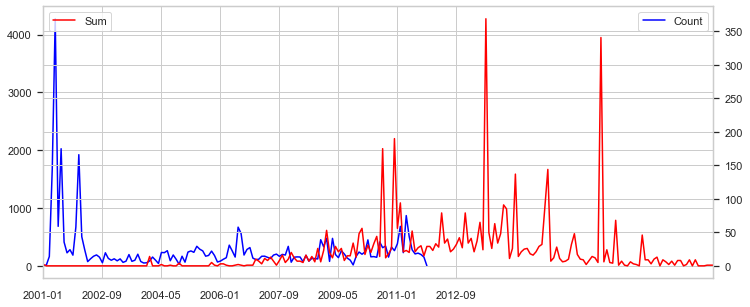

In [99]:
plt.figure(figsize=(12,5))

ax1 = init_date_count_df['CDPHId'].plot(color='blue', grid=True, label='Count')
ax2 = discontinued_date_count_df['CDPHId'].plot(color='red', grid=True, secondary_y=True, label='Sum')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

Text(0.5, 1.0, 'Number of Products Reported Over Time')

Text(0.5, 0, 'Time by Month')

Text(0, 0.5, 'Number of Products Reported')

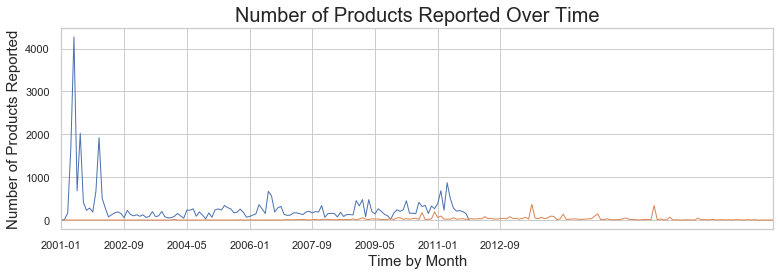

In [100]:
fig, ax = plt.subplots(figsize=(11, 4))

x=pd.date_range('2003-05', '2020-04')

init_date_count_df['CDPHId'].plot(x=x, ax=ax, linewidth=1);
discontinued_date_count_df['CDPHId'].plot(x=x, ax=ax, linewidth=1);

ax.set_title('Number of Products Reported Over Time', fontsize=20)
ax.set_xlabel('Time by Month', fontsize=15)
ax.set_ylabel('Number of Products Reported', fontsize=15)
fig.tight_layout()
fig.savefig('images/num_products_over_time_monthly')